In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="white")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [31]:
import pickle as pkl

In [32]:
with open("cleaned_df.pkl","rb") as f:
    cleaned_autos = pkl.load(f)  ## Loading data from cleaned_df.pkl

In [33]:
df=cleaned_autos.copy()

In [5]:
df

,name,seller,model,brand,offerType,dollar_price,abtest,vehicleType,gearbox,powerPS,fuelType,kilometer,notRepairedDamage,yearOfRegistration,monthOfRegistration,postalCode,dateCrawled,dateCreated,lastSeen
0,Golf 3 1.6,private,golf,volkswagen,Offer,528,test,Other,Manual,0,petrol,150000,Other,1993,January,70435,2016-03-24 11:52:17,2016-03-24,2016-04-07 03:16:57
1,A5 Sportback 2.7 Tdi,private,Other,audi,Offer,20130,test,coupe,Manual,190,diesel,125000,Yes,2011,May,66954,2016-03-24 10:58:45,2016-03-24,2016-04-07 01:46:50
2,"Jeep Grand Cherokee ""Overland""",private,grand,jeep,Offer,10780,test,suv,Automatic,163,diesel,125000,Other,2004,August,90480,2016-03-14 12:52:21,2016-03-14,2016-04-05 12:47:46
3,GOLF 4 1 4 3TÜRER,private,golf,volkswagen,Offer,1650,test,compact car,Manual,75,petrol,150000,No,2001,June,91074,2016-03-17 16:54:04,2016-03-17,2016-03-17 17:40:17
4,Skoda Fabia 1.4 TDI PD Classic,private,fabia,skoda,Offer,3960,test,compact car,Manual,69,diesel,90000,No,2008,July,60437,2016-03-31 17:25:20,2016-03-31,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371522,Mitsubishi Cold,private,colt,mitsubishi,Offer,0,control,Other,Manual,0,petrol,150000,Yes,2005,July,2694,2016-03-21 09:50:58,2016-03-21,2016-03-21 10:42:49
371523,Suche t4 vito ab 6 sitze,private,Other,sonstige_autos,Offer,2420,test,Other,Unspecified,0,Other,20000,Other,2005,January,39576,2016-03-14 17:48:27,2016-03-14,2016-04-06 00:46:52
371524,Smart smart leistungssteigerung 100ps,private,fortwo,smart,Offer,1318,test,convertible,Automatic,101,petrol,125000,No,2000,March,26135,2016-03-05 19:56:21,2016-03-05,2016-03-11 18:17:12
371525,Volkswagen Multivan T4 TDI 7DC UY2,private,transporter,volkswagen,Offer,10120,test,bus,Manual,102,diesel,150000,No,1996,March,87439,2016-03-19 18:57:12,2016-03-19,2016-04-07 07:15:26


## Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization

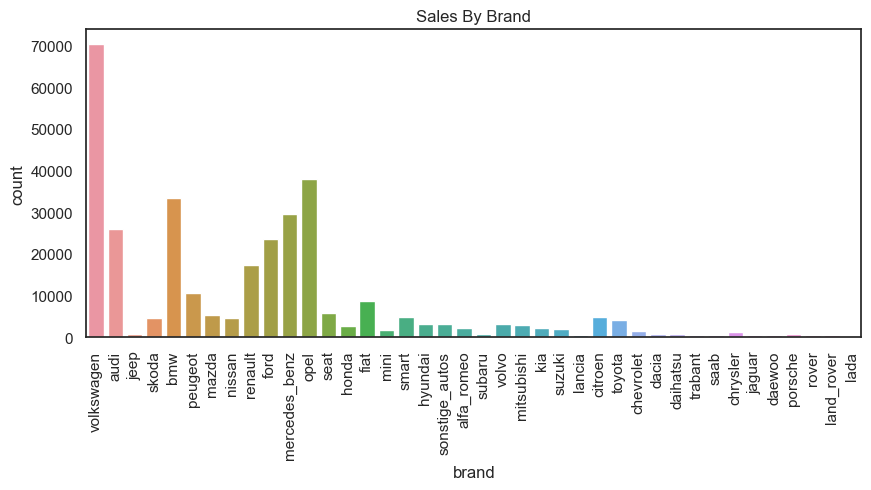

In [6]:
plt.figure(figsize=(10,4))
sns.countplot(x='brand', data=df)
plt.title("Sales By Brand")
plt.xticks(rotation=90)
plt.show()

## What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis?

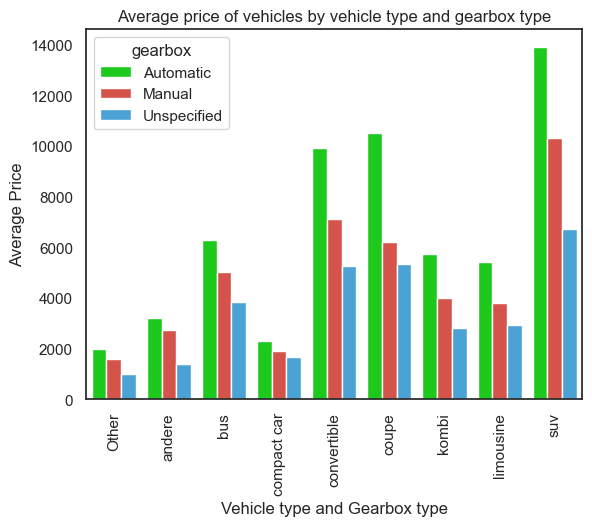

In [44]:
avg_price=(df.groupby(['vehicleType','gearbox'])['dollar_price'].mean()).reset_index()
colors=["#00e600", "#eb4034","#34a8eb"]
sns.barplot(x='vehicleType', y='dollar_price',hue="gearbox", palette=colors, data=avg_price)
plt.xlabel("Vehicle type and Gearbox type")
plt.ylabel("Average Price")
plt.title("Average price of vehicles by vehicle type and gearbox type")
plt.xticks(rotation=90)
plt.show()

### Numerical: 

In [34]:
average_price=df.groupby(['vehicleType','gearbox'])['dollar_price'].mean()

In [45]:
average_price=average_price.reset_index()

In [47]:
average_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vehicleType   27 non-null     object 
 1   gearbox       27 non-null     object 
 2   dollar_price  27 non-null     float64
dtypes: float64(1), object(2)
memory usage: 780.0+ bytes


## What is the marginal probability of private seller?

In [48]:
margin=(len(df[df['seller']=='private']))/(len(df))
print(f"{margin:.7f}")

0.9999908
